# Метод наименьших квадратов (Least squares approximation)

**Цель работы:** ознакомление с методом аппроксимации функций.

Продолжительность работы: - 4 часа.

Мягкий дедлайн (10 баллов): 03.10.2023

Жесткий дедлайн (5 баллов): 17.10.2023

## Задание

Дана таблица значений некоторой функциональной зависимости, полученной из $n = 6$ опытов

1. Методом наименьших квадратов по данной табличной зависимости найти аппроксимирующую функцию в виде:

  1.1) линейной функции $y = ax + b$;

  1.2) степенной функции $y = \beta \cdot x^a$;

  1.3) показательной функции $y = \beta \cdot e^{ax}$;

  1.4) квадратичной функции $y = ax^2 + bx + c$.

2. Построить в плоскости $xOy$ графики полученных функций и нанести экспериментальные точки.

3. Сравнить полученные результаты.


Промежуточные вычисления вести с точностью до 0,0001.

Значения параметров $a$, $b$, $c$ округлить до 0,01.

## Вариант 6  

|$x$ | 1 | 4 | 7 | 10 | 13 | 16 | 
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|
|$y$ | 3,0 | 7,6 | 11,2 | 13,8 | 17,1 | 19,5 | 


## Решение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math

X = [1, 4, 7, 10, 13, 16]
Y = [3.0, 7.6, 11.2, 13.8, 17.1, 19.5]
PARAM_ROUND = 2
COMP_ROUND = 4

#### 1.1) Найдем зависимость 𝑦 от 𝑥 в виде линейной функции 𝑦=𝑎𝑥+𝑏

Выберем значения коэффициентов $a$ и $b$ так, чтобы сумма квадратов отклонений
$ L(a, b) = \sum\limits_{i=1}^n (\Delta y_i)^2 = 
\sum\limits_{i=1}^{n} { \left((ax_i+b)-y_i\right)^2}$
была минимальной.


In [2]:
def find_min_params_of_lineral(X: list, Y: list) -> tuple:
    if len(X) != len(Y):
        raise Exception("Y should be a mapping of X")
        
    n = len(X)
    x_sum = sum(X)
    y_sum = sum(Y)
    x_sqrt_sum = sum(x**2 for x in X)
    x_y_multpl = sum(x*y for x, y in zip(X, Y))
    
    koof = np.array([[x_sqrt_sum, x_sum], [x_sum, n]])
    free = np.array([x_y_multpl, y_sum])
    
    params = scipy.linalg.solve(koof, free)
    
    return (round(x, PARAM_ROUND) for x in params)

In [3]:
a1, b1 = find_min_params_of_lineral(X, Y)
print(f'y = {a1}x + {b1}')

y = 1.08x + 2.84


#### 1.2) Найдем зависимость 𝑦 от 𝑥 в виде степенной функции 𝑦=𝛽⋅𝑥𝑎

Прологарифмировав равенство $y = \beta \cdot x^a$ по основанию $e$, получим
$\ln{y} = a\cdot \ln{x} + \ln{\beta}$.

Обозначим
$Y = \ln{y}$, $X = \ln{x}$, $b = \ln{\beta}$.


In [4]:
X_LOG = [round(math.log(x), COMP_ROUND) for x in X]
Y_LOG = [round(math.log(y), COMP_ROUND) for y in Y]

Тогда получим линейную функцию $Y = a \cdot X + b$, где переменные $X$ и $Y$ связаны следующей табличной зависимостью:

In [5]:
table = [X_LOG, Y_LOG]
df = pd.DataFrame(table, index=['X = ln(x)', 'Y = ln(y)'])
print(df)

                0       1       2       3       4       5
X = ln(x)  0.0000  1.3863  1.9459  2.3026  2.5649  2.7726
Y = ln(y)  1.0986  2.0281  2.4159  2.6247  2.8391  2.9704


Таким образом, данная задача свелась к задаче 1.1.

In [6]:
a2, b2 = find_min_params_of_lineral(X_LOG, Y_LOG)

Учитывая, что $b = \ln{\beta}$, находим $\beta = e^b$, и получаем искомую степенную функцию 

In [7]:
beta1 = round(pow(math.e, b2), PARAM_ROUND)
print(f"y = {beta1} * x^{a2}")

y = 3.0 * x^0.67


#### 1.3) Найдем зависимость 𝑦 от 𝑥 в виде показательной функции 𝑦=𝛽⋅𝑒𝑎𝑥

Прологарифмировав равенство $y = \beta \cdot e^{ax}$ по основанию $e$, получим
$\ln{y} = ax  + \ln{\beta}$.

Обозначим
$Y = \ln{y}$, $b = \ln{\beta}$.

Тогда получим линейную функцию $Y = a \cdot x + b$, где переменные $x$ и $Y$ связаны следующей табличной зависимостью:

In [8]:
table = [X, Y_LOG]
df = pd.DataFrame(table, index=['X', 'Y = ln(y)'])
print(df)

                0       1       2        3        4        5
X          1.0000  4.0000  7.0000  10.0000  13.0000  16.0000
Y = ln(y)  1.0986  2.0281  2.4159   2.6247   2.8391   2.9704


Таким образом, данная задача свелась к задаче 1.1.

In [9]:
a3, b3 = find_min_params_of_lineral(X, Y_LOG)

Учитывая, что $b = \ln{\beta}$, находим $\beta = e^b$, 
и получаем искомую степенную функцию 

In [10]:
beta2 = round(pow(math.e, b3), PARAM_ROUND)
print(f"y = {beta2} * e^{a3}x")

y = 3.9 * e^0.11x


#### 1.4) Найдем зависимость 𝑦 от 𝑥 в виде показательной функции 𝑦=𝑎𝑥2+𝑏𝑥+𝑐

In [11]:
n = len(X)
x_sum = sum(X)
x_pow2_sum = sum(x**2 for x in X)
x_pow3_sum = sum(x**3 for x in X)
x_pow4_sum = sum(x**4 for x in X)
y_sum = sum(Y) 
x_y_multpl = sum(x*y for x, y in zip(X, Y))
x_pow2_y_multpl = sum(pow(x, 2)*y for x, y in zip(X, Y))

koof = np.array([[x_pow4_sum, x_pow3_sum, x_pow2_sum], [x_pow3_sum, x_pow2_sum, x_sum], [x_pow2_sum, x_sum, n]])
free = np.array([x_pow2_y_multpl, x_y_multpl, y_sum])
    
a4, b4, c = (round(x, PARAM_ROUND) for x in scipy.linalg.solve(koof, free))

print(f"y = {a4}x^2 + {b4}x + {c}")

y = -0.02x^2 + 1.49x + 1.72


#### 2) Построим в плоскости 𝑥𝑂𝑦 графики полученных функций и нанесем экспериментальные точки

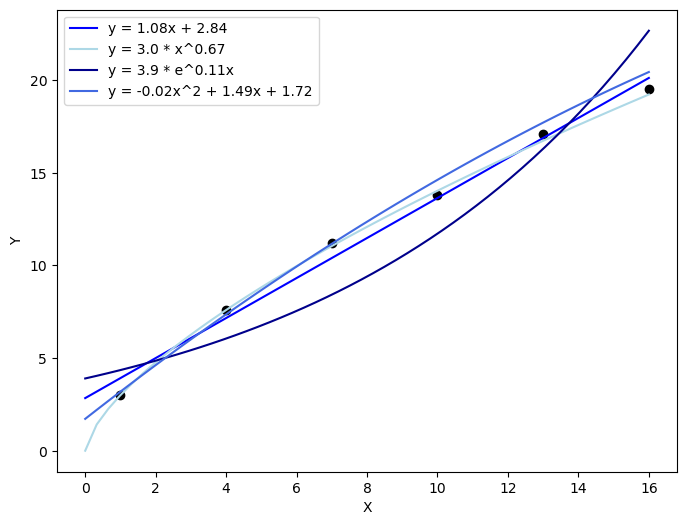

In [12]:
X_PLOT = np.array(X)
Y_PLOT = np.array(Y)

x = np.linspace(0, X[len(X) - 1])
y1 = a1*x + b1
y2 = beta1*pow(x, a2)
y3 = beta2*pow(math.e, a3*x)
y4 = a4*pow(x, 2) + b4*x + c

plt.figure(figsize=(8, 6))
plt.scatter(X_PLOT, Y_PLOT, color='black')
plt.plot(x, y1, label=f'y = {a1}x + {b1}', color='blue')
plt.plot(x, y2, label=f"y = {beta1} * x^{a2}", color='lightblue')
plt.plot(x, y3, label=f"y = {beta2} * e^{a3}x", color='darkblue')
plt.plot(x, y4, label=f"y = {a4}x^2 + {b4}x + {c}", color='royalblue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### 3) Сравним полученные результаты.
Для этого найдем соответствующие суммарные погрешности

\begin{equation}
   L(a, b) = \sum\limits_{i=1}^6 {(\Delta y_i)^2}
\end{equation}
для этого составим таблицу значений полученных функций

In [13]:
Y1 = [a1*x + b1 for x in X]
Y2 = [beta1*pow(x, a2) for x in X]
Y3 = [beta2*pow(math.e, a3*x) for x in X]
Y4 = [a4*pow(x, 2) + b4*x + c for x in X]
table = [X, Y, Y1, Y2, Y3, Y4]
df = pd.DataFrame(table, index=['X', 'Y', f'y = {a1}x + {b1}', f"y = {beta1} * x^{a2}", f"y = {beta2} * e^{a3}x", f"y = {a4}x^2 + {b4}x + {c}"])
print(df)

                                    0         1          2          3  \
X                            1.000000  4.000000   7.000000  10.000000   
Y                            3.000000  7.600000  11.200000  13.800000   
y = 1.08x + 2.84             3.920000  7.160000  10.400000  13.640000   
y = 3.0 * x^0.67             3.000000  7.594540  11.049355  14.032054   
y = 3.9 * e^0.11x            4.353484  6.055558   8.423088  11.716247   
y = -0.02x^2 + 1.49x + 1.72  3.190000  7.360000  11.170000  14.620000   

                                     4          5  
X                            13.000000  16.000000  
Y                            17.100000  19.500000  
y = 1.08x + 2.84             16.880000  20.120000  
y = 3.0 * x^0.67             16.728743  19.225677  
y = 3.9 * e^0.11x            16.296927  22.668506  
y = -0.02x^2 + 1.49x + 1.72  17.710000  20.440000  


In [14]:
L1 = round(sum(pow(y0 - y, 2) for y0, y in zip(Y, Y1)), PARAM_ROUND)
L2 = round(sum(pow(y0 - y, 2) for y0, y in zip(Y, Y2)), PARAM_ROUND)
L3 = round(sum(pow(y0 - y, 2) for y0, y in zip(Y, Y3)), PARAM_ROUND)
L4 = round(sum(pow(y0 - y, 2) for y0, y in zip(Y, Y4)), PARAM_ROUND)
print(f"L1: {L1}")
print(f"L2: {L2}")
print(f"L3: {L3}")
print(f"L4: {L4}")

L1: 2.14
L2: 0.29
L3: 26.95
L4: 2.02


## Вывод

В данной задаче лучшей аппроксимирующей функцией является степенная функция:

In [16]:
print(f"y = {beta1} * x^{a2}")

y = 3.0 * x^0.67
